In [1]:
import numpy as np
import pandas as pd

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
df=pd.read_csv('/wine.csv')

In [20]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [24]:
df['quality'].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [23]:
df['volatile acidity'].value_counts()

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.580    38
         ..
1.005     1
0.955     1
1.580     1
1.180     1
0.895     1
Name: count, Length: 143, dtype: int64

In [26]:
df.shape

(1599, 12)

In [27]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

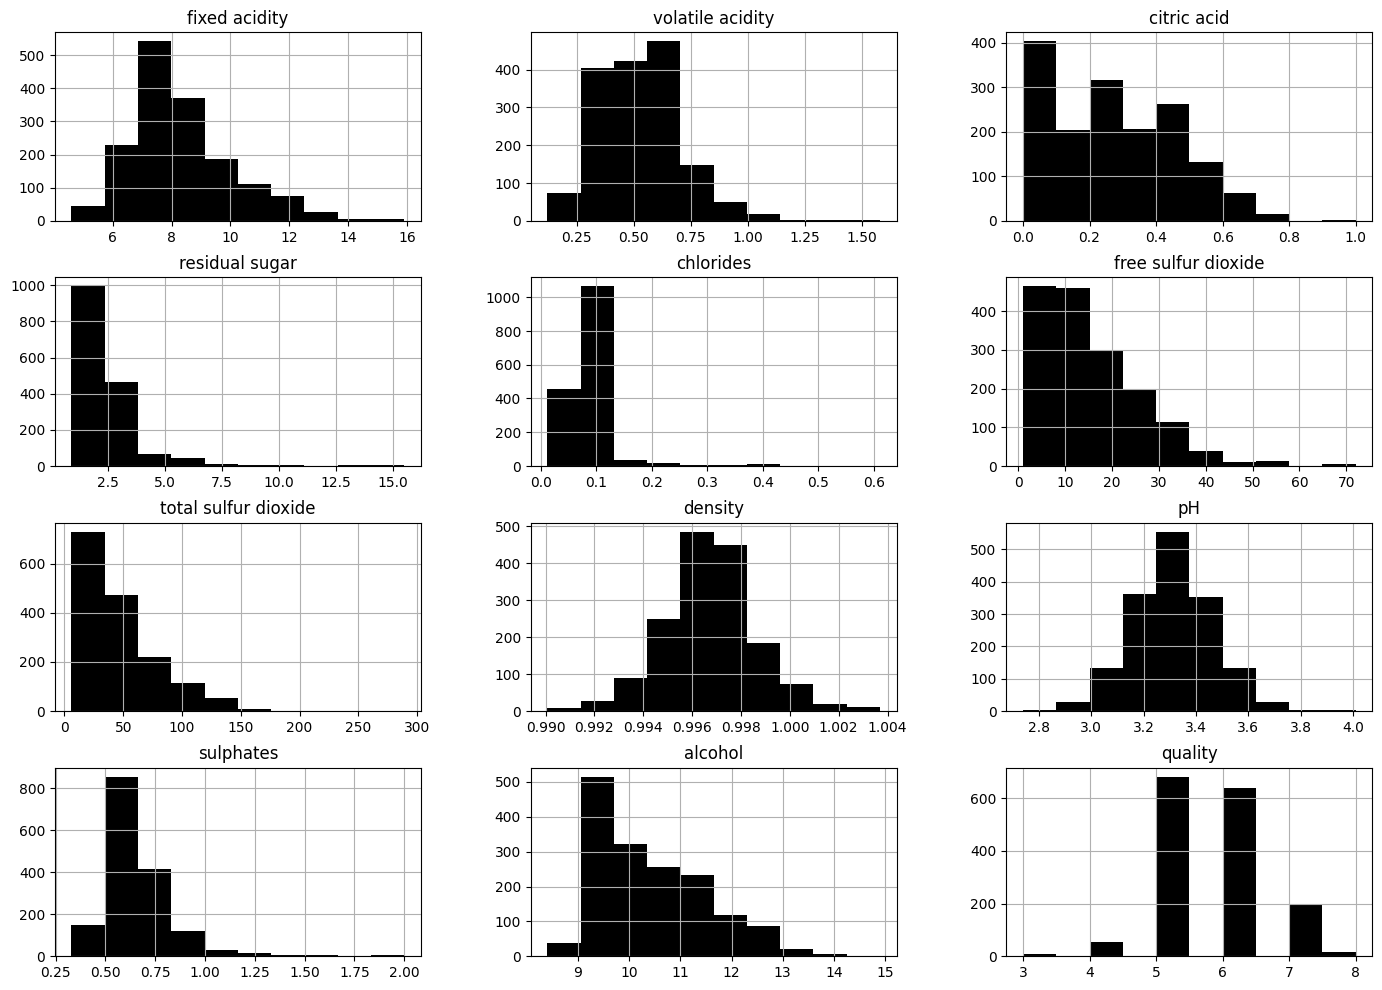

In [37]:
df.hist(figsize=(17,12),color='black')
plt.show()

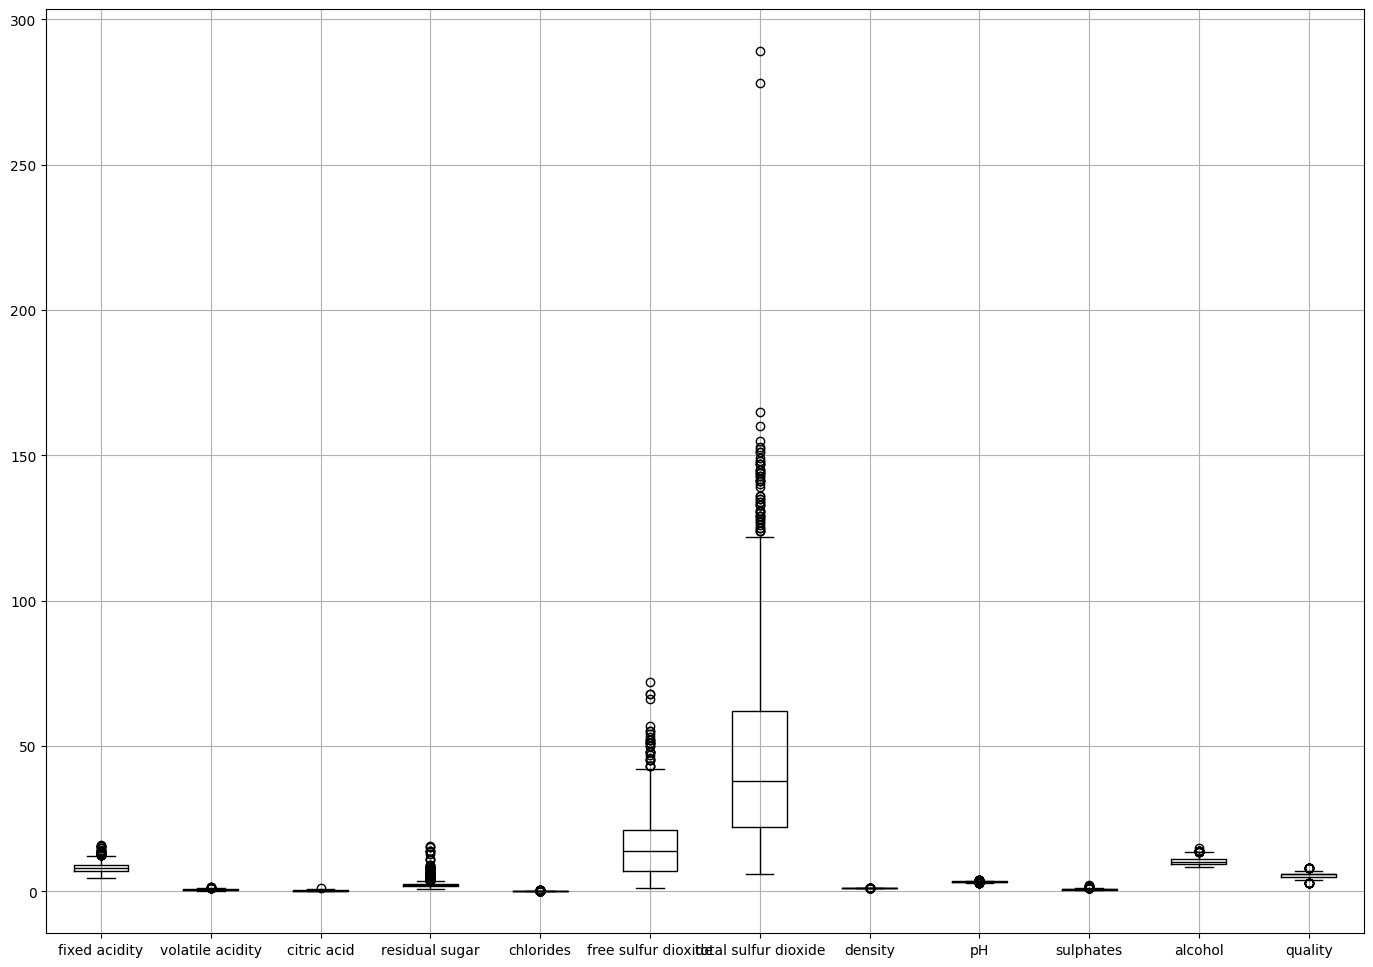

In [38]:
df.boxplot(figsize=(17,12),color='black')
plt.show()

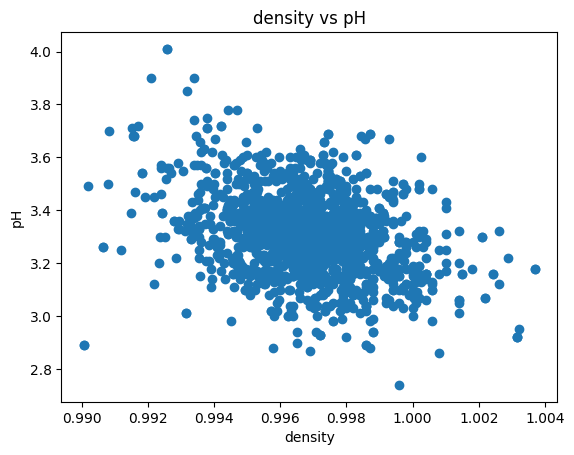

In [43]:
d=df["density"]
ph=df["pH"]

plt.scatter(d,ph)
plt.title("density vs pH")
plt.xlabel("density")
plt.ylabel("pH")
plt.show()


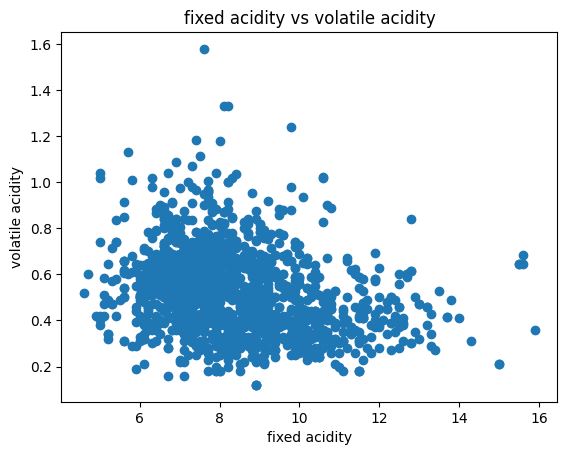

In [47]:
#fixed acidity	volatile acidity

fa=df["fixed acidity"]
va=df["volatile acidity"]

plt.scatter(fa,va)
plt.title("fixed acidity vs volatile acidity")
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")
plt.show()

<Axes: >

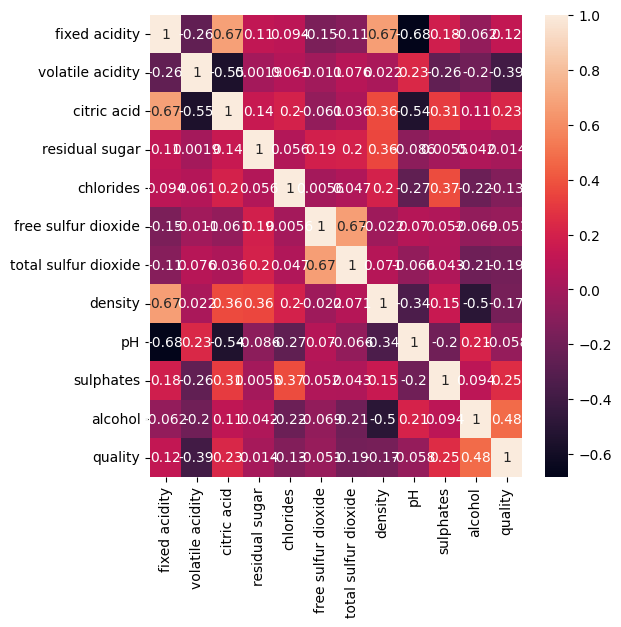

In [56]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)


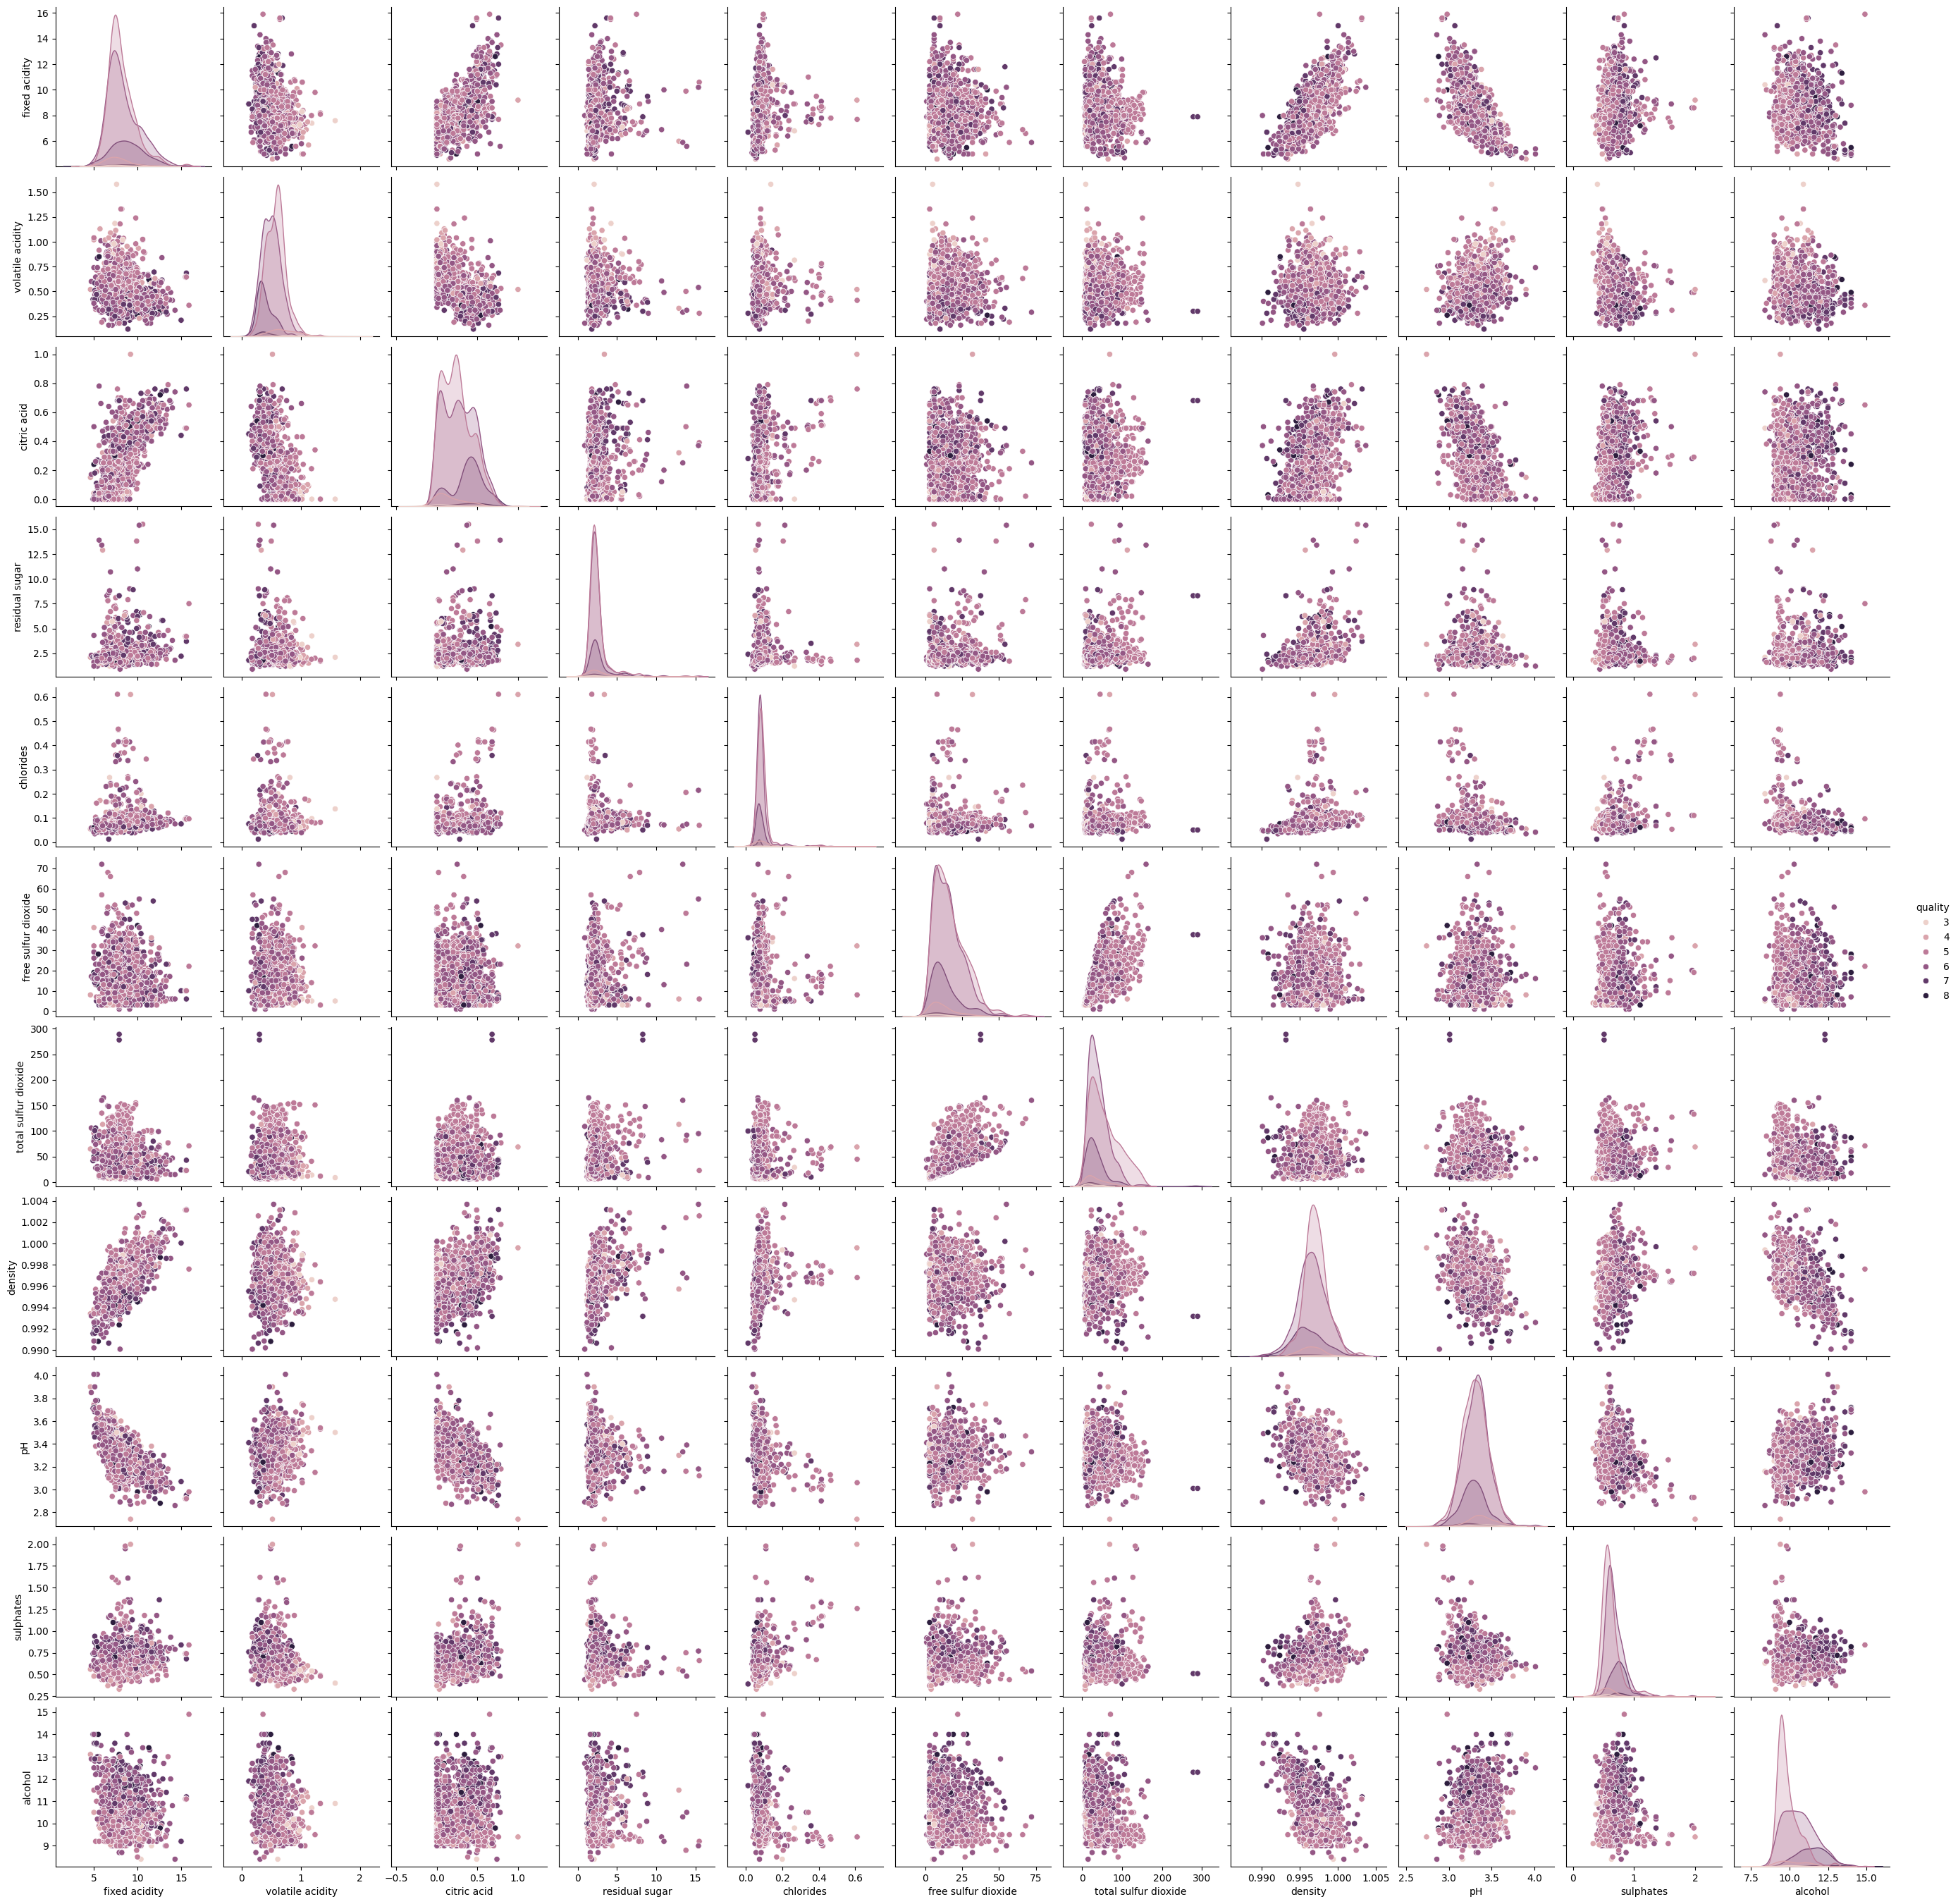

In [57]:
sns.pairplot(df,hue='quality')

In [58]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
x=df[cols]
y=df['quality']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10, random_state=42, shuffle=True)

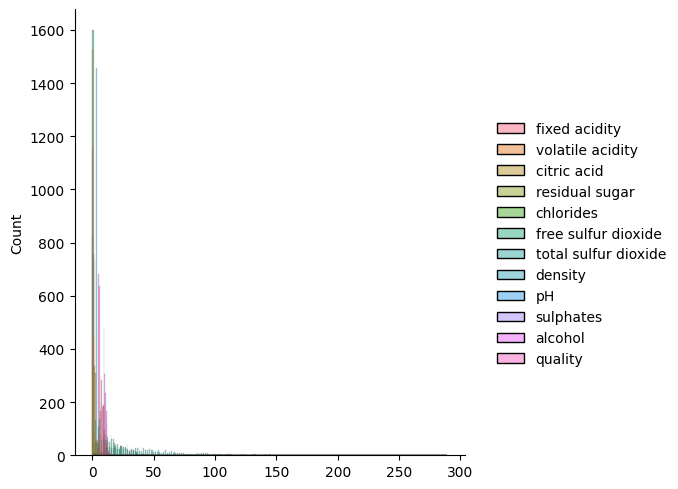

In [72]:
sns.displot(df)

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [69]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#

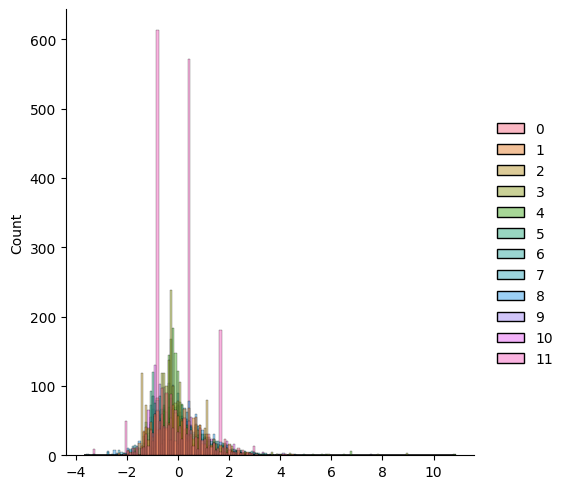

In [73]:
sns.displot(x_train)

In [74]:
from sklearn.neighbors import KNeighborsClassifier


In [75]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [76]:
pred = knn.predict(x_test)
pred

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 4, 5, 5, 6, 7, 5, 6, 7, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 7, 5,
       6, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5,
       7, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 6, 5, 6, 6, 6])

In [77]:
matrix=confusion_matrix(y_test,pred)
matrix

array([[ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0, 64,  4,  0,  0],
       [ 0,  0,  2, 64,  0,  0],
       [ 0,  0,  0,  4, 14,  0],
       [ 0,  0,  0,  0,  4,  0]])

In [79]:
print(100*accuracy_score(y_test,pred))

88.75
